### 2. Modeling Number of Payment Messages
TP EFTEMKT2 ADET A01

In [68]:
import pandas as pd

data_path = "C:\\Users\\EylülRanaSaraç\\OneDrive - boun.edu.tr\\Masaüstü\\IE 360\\hw1\\messages2.csv"

df = pd.read_csv(data_path, delimiter=';', decimal=',', na_values=';;')

# save the Date column and delete it from the df
date_series = df['Date']
df = df.drop('Date', axis=1)

for column in df.columns:
    if df[column].dtype == 'object':  # controls the string data type
        df[column] = df[column].str.replace('.', '').str.replace(',', '.').astype(float)

# add the Date column again to the first column
df.insert(0, 'Date', date_series)

# delete the rows with all NaN values
df.dropna(how='all', inplace=True)

,Date,TP KKHARTUT KT1,TP KKHARTUT KT6,TP KKHARTUT KT15,TP KKHARTUT KT50,TP KKISLADE KA1,TP KKISLADE KA15,TP KKISLADE KA50,TP ZORUNDTH KB1,TP TSENETLER TUTAR,...,TP KB GEN01,TP KB GEN02,TP KB GEN06,TP KB GEN07,TP KB GEN09,TP KB GEN14,TP KB GEN17,TP KB GEN21,TP KB GEN28,TP KB GEN29
0,2011-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66226.78,13669512.0,...,21919133.0,19747727.0,NaN,461709.0,1621079.0,5572802.0,2709978.0,10626375.0,51438.0,2177700.0
1,2011-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65068.04,13765455.0,...,28394161.0,25980281.0,NaN,489542.0,1760228.0,5579803.0,3512289.0,9411653.0,60032.0,2402831.0
2,2011-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64565.89,14690378.0,...,22273976.0,19702757.0,NaN,640342.0,1829730.0,4048388.0,1245323.0,15006805.0,211703.0,3259916.0
3,2012-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67018.89,14817395.0,...,27648005.0,23459958.0,NaN,1215499.0,1713143.0,7460760.0,5390710.0,10122876.0,38854.0,2128726.0
4,2012-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69151.83,14767754.0,...,26792255.0,22738404.0,NaN,1187011.0,2547914.0,5735746.0,8613508.0,13135717.0,90441.0,2912415.0


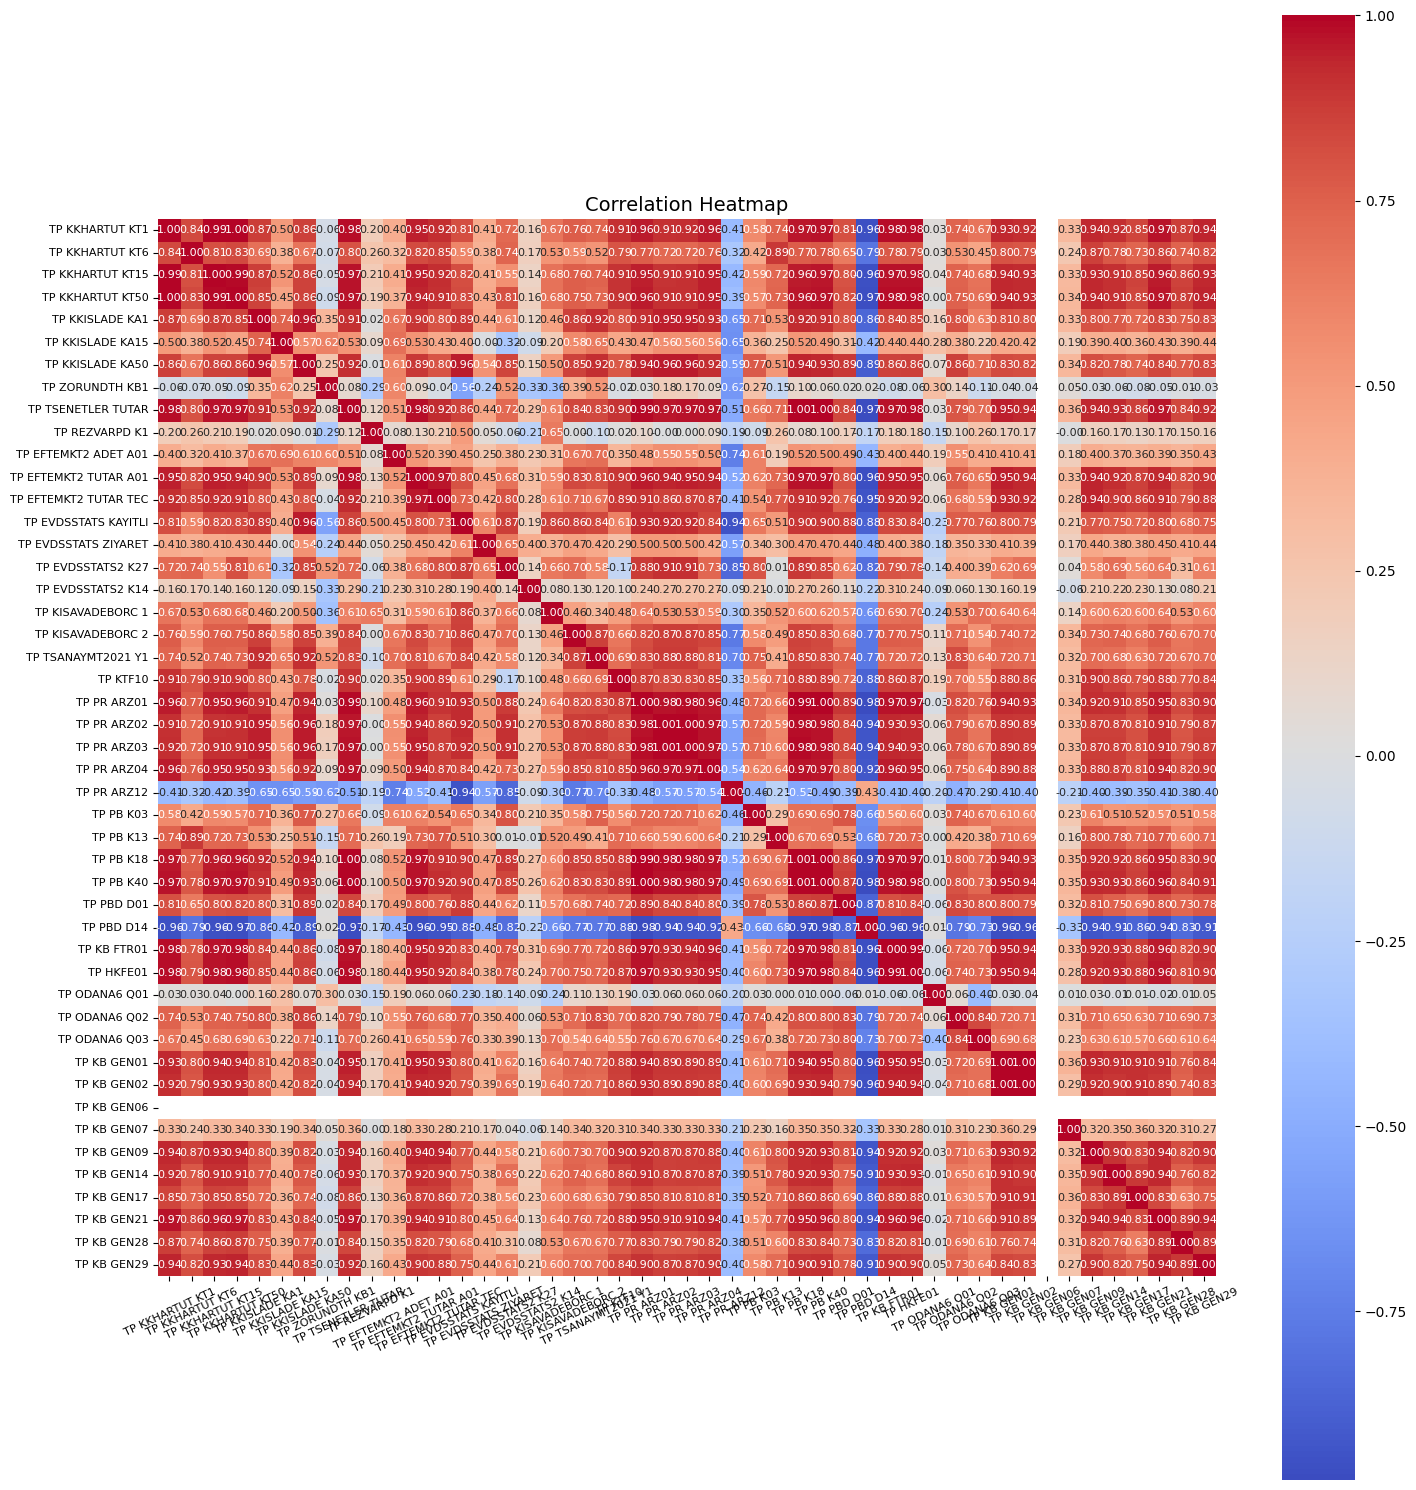

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(15, 15))

# draw the heatmap
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                 annot_kws={'size': 8}, square=True)

plt.xticks(fontsize=8, rotation=25)
plt.yticks(fontsize=8, rotation=0)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()

plt.show()

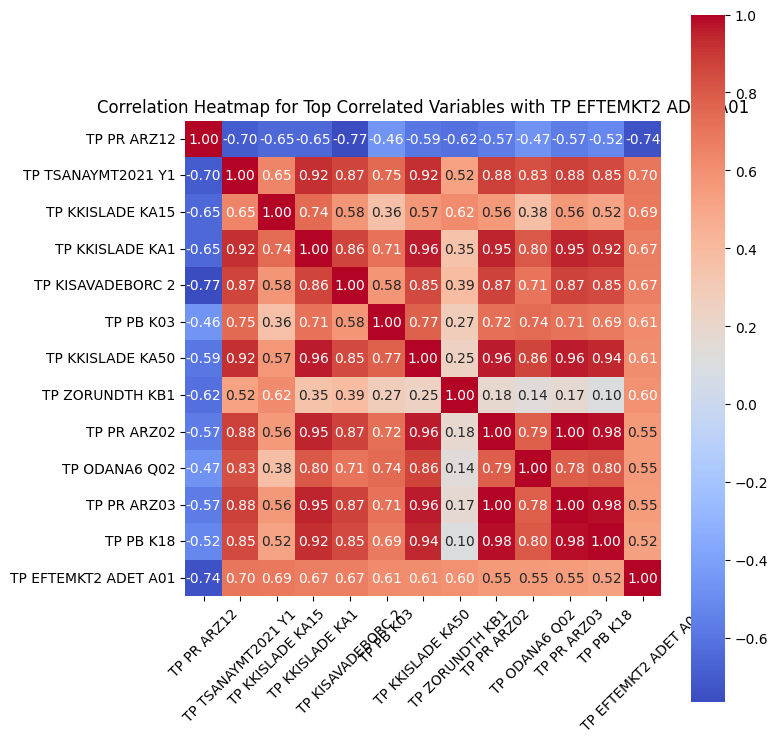

In [70]:
# FINDING HIGH CORRELATED DATA WITH 'TP EFTEMKT2 ADET A01' 

target_correlations = correlation_matrix['TP EFTEMKT2 ADET A01'].drop('TP EFTEMKT2 ADET A01')

sorted_correlations = target_correlations.abs().sort_values(ascending=False)

top_variables = sorted_correlations.head(12).index.tolist()

top_variables.append('TP EFTEMKT2 ADET A01')

filtered_corr_matrix = correlation_matrix.loc[top_variables, top_variables]

plt.figure(figsize=(8, 8))

ax = sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                 annot_kws={'size': 10}, square=True)

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.title('Correlation Heatmap for Top Correlated Variables with TP EFTEMKT2 ADET A01', fontsize=12)
plt.tight_layout()

plt.show()

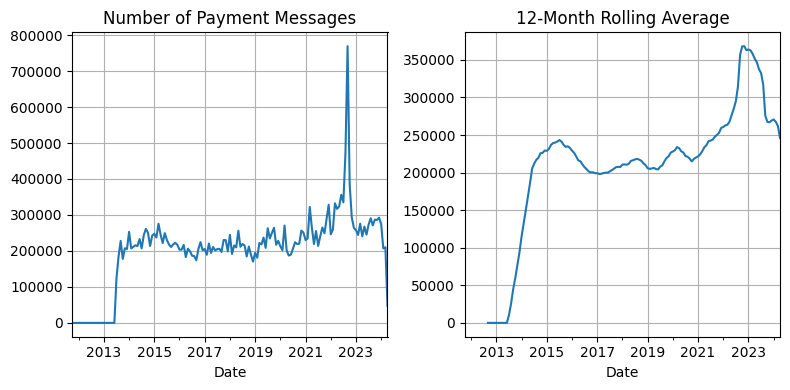

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 1. line plot
df['TP EFTEMKT2 ADET A01'].plot(ax=ax[0])
ax[0].set_title('Number of Payment Messages')
ax[0].grid(True)

# 2. 12-Month Rolling Average
df['TP EFTEMKT2 ADET A01'].rolling(window=12).mean().plot(ax=ax[1])
ax[1].set_title('12-Month Rolling Average')
ax[1].grid(True)

plt.tight_layout()
plt.show()

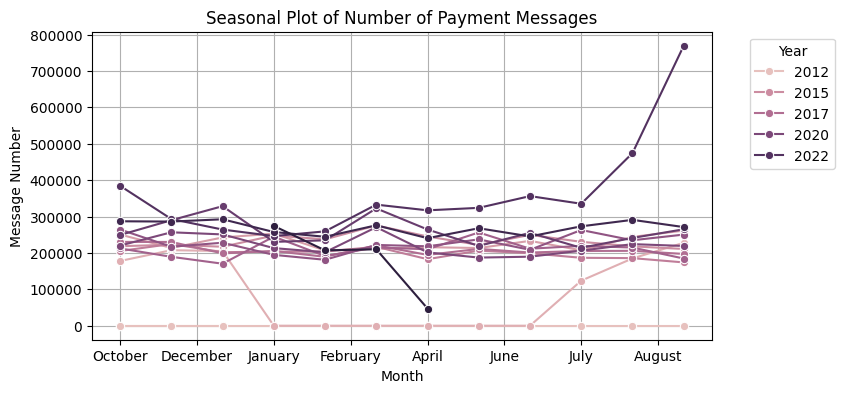

In [72]:
from matplotlib.ticker import MaxNLocator

df['Month'] = df.index.month_name()
df['Year'] = df.index.year

plt.figure(figsize=(8, 4))
sns.lineplot(x="Month", y="TP EFTEMKT2 ADET A01", hue="Year", data=df, marker='o')

plt.title('Seasonal Plot of Number of Payment Messages')
plt.ylabel('Message Number')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=12))

plt.show()

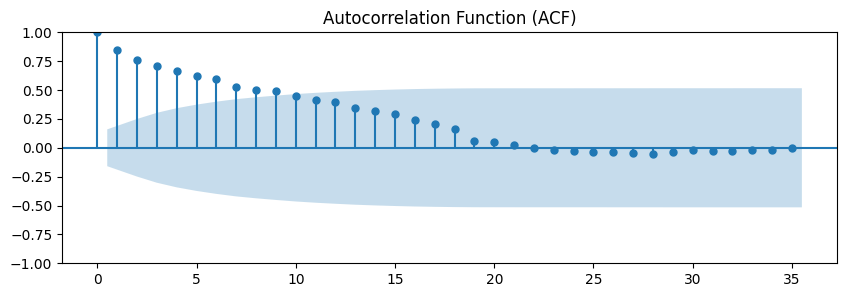

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF
plt.figure(figsize=(10, 3))
plot_acf(df['TP EFTEMKT2 ADET A01'], lags=35, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.show()

Looking at the ACF (Autocorrelation Function) plot, we can see that the autocorrelation values of the time series are significant and positive for the first few lags, indicating that the series is significantly predictable based on its previous values. The values slowly decrease, but after a certain lag the autocorrelation ceases to be significant and remains within the confidence interval. This may indicate that the series may have a trend or seasonal characteristics.

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

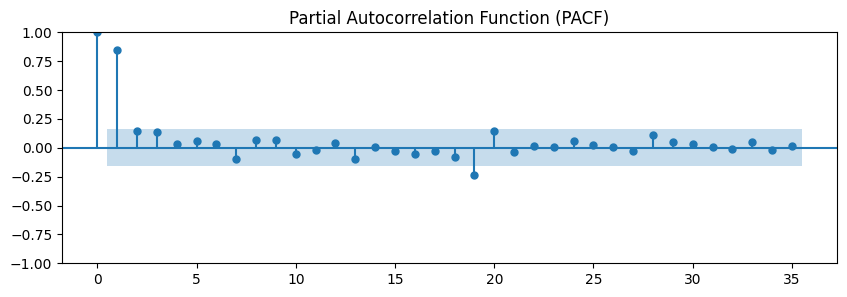

In [74]:
# PACF
plt.figure(figsize=(10, 3))
plot_pacf(df['TP EFTEMKT2 ADET A01'], lags=35, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

Except for the first one or two lags, almost all of the PACF values fall within the confidence interval. This suggests that we can use a low "p" value for an AR(p) model that does not directly depend on the past values of the time series.

### Introducing Independent Variables
1. TP.TSANAYMT2021.Y1	Total Industry

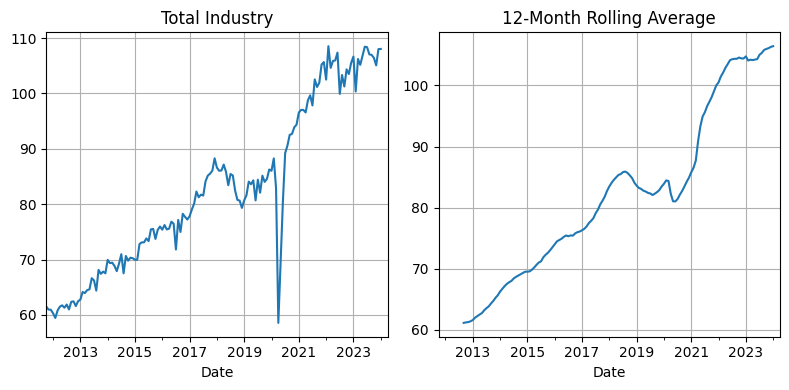

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 1. line plot
df['TP TSANAYMT2021 Y1'].plot(ax=ax[0])
ax[0].set_title('Total Industry')
ax[0].grid(True)

# 2. 12-Month Rolling Average
df['TP TSANAYMT2021 Y1'].rolling(window=12).mean().plot(ax=ax[1])
ax[1].set_title('12-Month Rolling Average')
ax[1].grid(True)

plt.tight_layout()
plt.show()

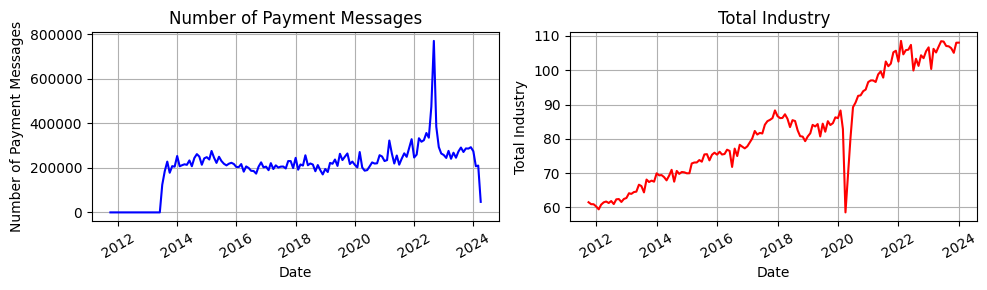

In [76]:
# Comparing Total Industry and Number of Payment Messages data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# 1st subplot
axes[0].plot(df.index, df['TP EFTEMKT2 ADET A01'], label='Number of Payment Messages', color='blue')
axes[0].set_title('Number of Payment Messages')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Payment Messages')
axes[0].grid(True)

# 2nd subplot
axes[1].plot(df.index, df['TP TSANAYMT2021 Y1'], label='Total Industry', color='red')
axes[1].set_title('Total Industry')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Industry')
axes[1].grid(True)

for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

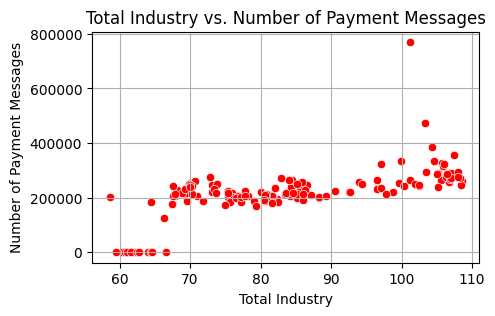

In [77]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='TP TSANAYMT2021 Y1', y='TP EFTEMKT2 ADET A01', data=df, color='red')
plt.title('Total Industry vs. Number of Payment Messages')
plt.xlabel('Total Industry')
plt.ylabel('Number of Payment Messages')
plt.grid(True)
plt.show()

### Model

R^2 Score:  0.5634093214401321
Mean Squared Error (MSE): 4294717132.2089877
Number of Payment Messages = -184722.27721905446 + [4690.26821046] * (RUB/TRY) 


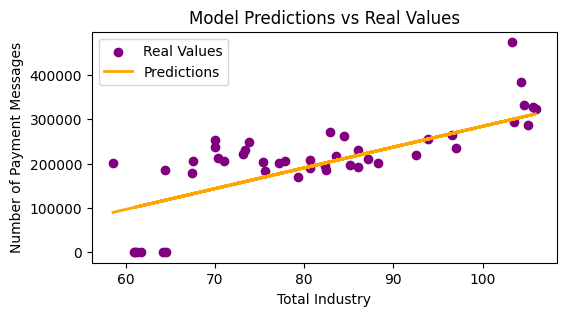

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df.dropna(subset=['TP TSANAYMT2021 Y1'], inplace=True)

# indepentent variable
X = df[['TP TSANAYMT2021 Y1']].values

# depentent variable
y = df['TP EFTEMKT2 ADET A01'].values

# creating test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)

# evaluating the model performance
print(f"R^2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print(f"Number of Payment Messages = {model.intercept_} + {model.coef_} * (RUB/TRY) ")

plt.figure(figsize=(6, 3))
plt.scatter(X_test, y_test, color='purple', label='Real Values')
plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Predictions')
plt.title('Model Predictions vs Real Values')
plt.xlabel('Total Industry')
plt.ylabel('Number of Payment Messages')
plt.legend()
plt.show()

Introduce Other Independent Variables

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# variables
X = df[['TP TSANAYMT2021 Y1', 'TP PR ARZ12']].values  # 'TP PR ARZ12' new columnn
y = df['TP EFTEMKT2 ADET A01'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R^2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R^2 Score:  0.6904946125052478
Mean Squared Error (MSE): 3044586509.6554513


In [80]:
# variables
X = df[['TP TSANAYMT2021 Y1', 'TP PR ARZ12', 'TP KISAVADEBORC 2']].values
y = df['TP EFTEMKT2 ADET A01'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R^2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R^2 Score:  0.6916205156480171
Mean Squared Error (MSE): 3033511065.8727098


In [81]:
# variables
X = df[['TP TSANAYMT2021 Y1', 'TP PR ARZ12', 'TP PB K03']].values
y = df['TP EFTEMKT2 ADET A01'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R^2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R^2 Score:  0.7220928927963686
Mean Squared Error (MSE): 2733756062.7887096


In [82]:
# variables
X = df[['TP TSANAYMT2021 Y1', 'TP PR ARZ12', 'TP PB K03', 'TP KKISLADE KA50']].values
y = df['TP EFTEMKT2 ADET A01'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R^2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R^2 Score:  0.7222664222479009
Mean Squared Error (MSE): 2732049063.6587753


In [83]:
# variables
X = df[['TP TSANAYMT2021 Y1', 'TP PR ARZ12', 'TP PB K03', 'TP ZORUNDTH KB1']].values
y = df['TP EFTEMKT2 ADET A01'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R^2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R^2 Score:  0.7364916703467319
Mean Squared Error (MSE): 2592116124.8212028


In [84]:
# variables
X = df[['TP TSANAYMT2021 Y1', 'TP PR ARZ12', 'TP PB K03', 'TP ZORUNDTH KB1', 'TP PB K18']].values
y = df['TP EFTEMKT2 ADET A01'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R^2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R^2 Score:  0.7152584025618989
Mean Squared Error (MSE): 2800986546.0338235


In [85]:
# variables
X = df[['TP TSANAYMT2021 Y1', 'TP PR ARZ12', 'TP PB K03', 'TP ZORUNDTH KB1', 'TP ODANA6 Q02']].values
y = df['TP EFTEMKT2 ADET A01'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R^2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R^2 Score:  0.7435005841209332
Mean Squared Error (MSE): 2523169847.3525004


Generally, the model is considered to explain the variance of the dependent variable well when the R^2 score is above 0.7. In our case, the model seems to explain the variance of the dependent variable fairly well.